# GATHER

First, i import the necessary libraries that i would require for this analysis.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np; np.random.seed(42)
import os
import matplotlib.pyplot as plt
%matplotlib inline
import tarfile
from six.moves import urllib
import seaborn as sns

I used the pandas read function "pd.read_csv" to display the dataset in the notebook and saved it as df.

In [3]:
df = pd.read_csv(r"C:\Users\udeez\Downloads\201902-fordgobike-tripdata.csv")

# ASSESSMENT

I will be carrying out visual assessment and programmatic assessment.

## 1) VISUAL ASSESSMENT

Using visual assessment, i came up with the following assessments:

In [4]:
#To display the dataset
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


## 2) PROGRAMMATIC ASSESSMENT

I carried out a programmatic assessment also and came up with the following assessment of the dataset:

In [5]:
#To get a summarised view of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
#To get the statistical view of the dataset
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
#To get check for unique values in the dataset
df.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [8]:
#To check for duplicated values in the dataset
print(df.duplicated().sum())

0


In [9]:
#To check for null values in the dataset
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [10]:
#To display the null values in the dataset
df.isnull()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
183408,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
183409,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
183410,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# CLEAN

First, i created a copy of the original dataset to work with so as not to alter the original dataset.¶

In [11]:
df_copy = df.copy()
df_copy

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


# PROBLEM STATEMENT
## QUALITY ISSUES
- start_time is represented as a string datatype instead of date-time datatype.
- end_time is represented as a string datatype instead of date-time datatype.
- start_station_id is represented as a float datatype but it should be represented as a string datatype because it won't be used for any arithmetic operation.
- end_station_id is represented as a float datatype but it should be represented as a string datatype beacuse it won't be used for any arithmetic operation.
- bike_id is represented as an integer datatype but it should be represented as a string datatype because it won't be used for any arithmetic operation.

## TIDY ISSUES
- start_station_id contains some null/missing values.
- start_station_name contains some null/missing values.
- member_birth_year contains some null/missing values.
- member_gender contains some null/missing values.

# DEFINE
## QUALITY ISSUES
- Conversion of start_time and end_time to date_time datatype.
- Conversion of start_station_id, end_station_id and bike_id to string datatype.

## TIDY ISSUES
- Drop all rows with null/missing values.

## QUALITY ISSUES

Conversion of start_time and end_time to date_time datatype

In [12]:
#Conversion of start_time from string to datetime datatype
df_copy['start_time'] = pd.to_datetime(df_copy['start_time'], format = '%Y-%m-%d\t%H:%M:%S.%f')

In [13]:
#To check if the change was implement in start_time
df_copy['start_time']

0        2019-02-28 17:32:10.145
1        2019-02-28 18:53:21.789
2        2019-02-28 12:13:13.218
3        2019-02-28 17:54:26.010
4        2019-02-28 23:54:18.549
                   ...          
183407   2019-02-01 00:04:49.724
183408   2019-02-01 00:05:34.744
183409   2019-02-01 00:06:05.549
183410   2019-02-01 00:05:34.360
183411   2019-02-01 00:00:20.636
Name: start_time, Length: 183412, dtype: datetime64[ns]

To check the month(s) in the start_time column.

In [14]:
df_copy['start_time'].apply(lambda x: x.month).unique()

array([2], dtype=int64)

In [15]:
#Creating a function to get the month in the start_time column
def get_month(date):
    return date.month

In [16]:
df_copy['start_time'].apply(get_month)

0         2
1         2
2         2
3         2
4         2
         ..
183407    2
183408    2
183409    2
183410    2
183411    2
Name: start_time, Length: 183412, dtype: int64

In [17]:
#Conversion of end_time from string to datetime datatype
df_copy['end_time'] = pd.to_datetime(df_copy['end_time'], format = '%Y-%m-%d\t%H:%M:%S.%f')

In [18]:
#To check if the change was implemented
df_copy['end_time']

0        2019-03-01 08:01:55.975
1        2019-03-01 06:42:03.056
2        2019-03-01 05:24:08.146
3        2019-03-01 04:02:36.842
4        2019-03-01 00:20:44.074
                   ...          
183407   2019-02-01 00:12:50.034
183408   2019-02-01 00:10:48.502
183409   2019-02-01 00:08:27.220
183410   2019-02-01 00:07:54.287
183411   2019-02-01 00:04:52.058
Name: end_time, Length: 183412, dtype: datetime64[ns]

To check the month(s) in the end_time column.

In [19]:
df_copy['end_time'].apply(lambda x: x.month).unique()

array([3, 2], dtype=int64)

In [20]:
#Creating a function to get the month in the end_time column
def get_month(date):
    return date.month

In [21]:
df_copy['end_time'].apply(get_month)

0         3
1         3
2         3
3         3
4         3
         ..
183407    2
183408    2
183409    2
183410    2
183411    2
Name: end_time, Length: 183412, dtype: int64

Conversion of start_station_id, end_station_id and bike_id to string datatype.

In [22]:
df_copy['start_station_id'] = df_copy['start_station_id'].astype(str)

In [23]:
df_copy['end_station_id'] = df_copy['end_station_id'].astype(str)

In [24]:
df_copy['bike_id'] = df_copy['bike_id'].astype(str)

# TIDINESS ISSUES

Drop all rows with null/missing values.

In [25]:
df_copy= df_copy[df_copy.start_station_id.notnull()]

In [26]:
df_copy = df_copy[df_copy.start_station_name.notnull()]

In [27]:
df_copy = df_copy[df_copy.end_station_id.notnull()]

In [28]:
df_copy = df_copy[df_copy.end_station_name.notnull()]

In [29]:
df_copy = df_copy[df_copy.member_birth_year.notnull()]

In [30]:
df_copy = df_copy[df_copy.member_gender.notnull()]

# TEST

To check that all cleaning acts have been implemented.

In [31]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

# VISUALIZATION

## QUESTIONS AND INSIGHTS

### UNIVARIATE VISUALIZATION

In [32]:
#A function for my bar plots in my visualization
def countPlot(dataframe, xVar, color):
    plt.figure(figsize = [8, 6])
    sns.countplot(data = dataframe, x = xVar, color = color);
    plt.title(f'A values count of {xVar} distribution', fontsize = 15, fontweight = 'bold')
    plt.xlabel(xVar.title(), fontsize = 10, fontweight = 'bold')
    plt.ylabel('Count'.title(), fontsize = 10, fontweight = 'bold')
    plt.show();

In [33]:
#A function for my histogram plots in my visualization
def myHistPlot(dataframe, xVar):
    plt.figure(figsize = [8, 6])
    dataframe[xVar].hist()
    plt.title(f'A histogram showing {xVar} distribution', fontsize=15, fontweight='bold')
    plt.xlabel(xVar)
    plt.ylabel('frequency')
    plt.show();

In [34]:
#A function for my pie plots in my visualization
def myPiePlot(dataframe, xVar):
    labels = df_copy[xVar].value_counts().index
    plt.pie(dataframe[xVar].value_counts(), autopct='%1.1f%%', labels = labels)
    plt.title(f'A pie chart showing {xVar} distribution', fontsize=15, fontweight='bold')
    plt.legend(loc=(1.3,0.5));

QUESTION 1: How males, females and other genders users are registered on this platform?

In [35]:
#To get the value counts of the member gender
df_copy['member_gender'].value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

OBSERVATION: There are 130500 males, 40805 females and 3647 other genders in the member_gender column.

QUESTION 2: Which gender has the highest number of registered users?

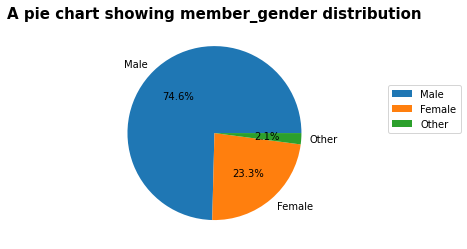

In [36]:
#Plotting the value counts of the member gender in a pie chart to visualize the proportions of each gender.
myPiePlot(dataframe = df_copy, xVar = 'member_gender')

OBSERVATION: The male gender has the highest number of registered users.

QUESTION 3: What are age grades of the users registered on this platform?

In [37]:
#To get the value counts of member_birth_year
df_copy['member_birth_year'].value_counts()

1988.0    10214
1993.0     9323
1989.0     8967
1990.0     8640
1991.0     8484
          ...  
1928.0        1
1878.0        1
1930.0        1
1910.0        1
1927.0        1
Name: member_birth_year, Length: 75, dtype: int64

In [38]:
#Creating a function to rename columns 
def rename_column(old_name, new_name):
    df_copy.rename(columns={old_name:new_name}, inplace=True)

In [39]:
#converting member_birth_year to member_age
rename_column('member_birth_year','member_age')

#finding the difference between the start_time of the current year and member_birth_year to get the member_age
df_copy.member_age = df_copy.start_time.dt.year - df_copy.member_age

In [40]:
df_copy.member_age

0         35.0
2         47.0
3         30.0
4         45.0
5         60.0
          ... 
183407    23.0
183408    35.0
183409    29.0
183410    31.0
183411    30.0
Name: member_age, Length: 174952, dtype: float64

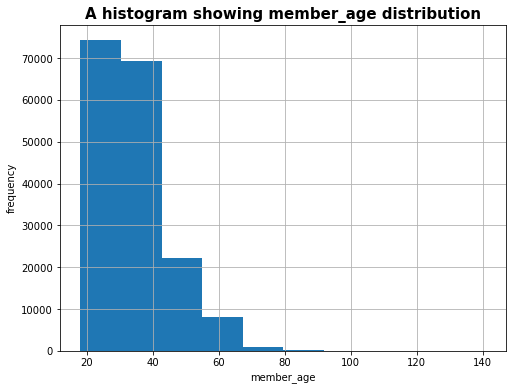

In [41]:
#Representing the distribution of member_age in a histogram
myHistPlot(dataframe = df_copy, xVar = 'member_age')

In [42]:
df_copy['member_age']

0         35.0
2         47.0
3         30.0
4         45.0
5         60.0
          ... 
183407    23.0
183408    35.0
183409    29.0
183410    31.0
183411    30.0
Name: member_age, Length: 174952, dtype: float64

For more emphasis, i created a plot to show the age bracket of users registered on the platform.

In [43]:
df_copy['age_bracket'] = pd.cut(x=df_copy['member_age'], bins=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
order = df_copy['age_bracket'].value_counts().index

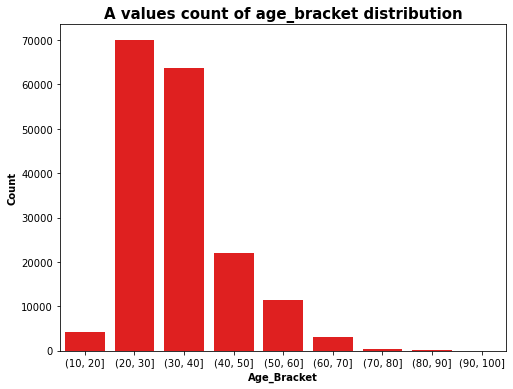

In [44]:
countPlot(dataframe = df_copy, xVar = 'age_bracket', color = 'red')

In [45]:
df_copy[['member_age', 'age_bracket']]

,member_age,age_bracket
0,35.0,"(30, 40]"
2,47.0,"(40, 50]"
3,30.0,"(20, 30]"
4,45.0,"(40, 50]"
5,60.0,"(50, 60]"
...,...,...
183407,23.0,"(20, 30]"
183408,35.0,"(30, 40]"
183409,29.0,"(20, 30]"
183410,31.0,"(30, 40]"


OBSERVATION: The age grade of registered users ranges from age 20 to age 90.

QUESTION 4: How many of the registered users are suscribers or customers?

In [46]:
df_copy['user_type'].value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

OBSERVATION: There are 158386 subscribers and 16566 customers registered users.

QUESTION 5: Which one of the user types has the highest distribution?

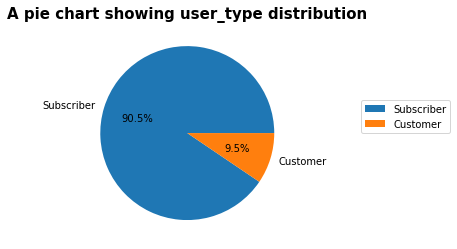

In [47]:
myPiePlot(dataframe = df_copy, xVar = 'user_type')

OBSERVATION: Subscribers have the highest user type distribution.

QUESTION 6: Were users more open to bike sharing for all trips?

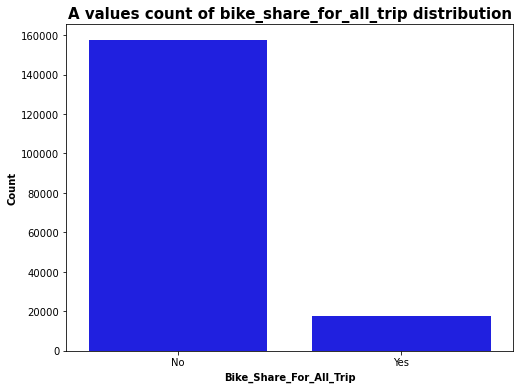

In [48]:
countPlot(dataframe = df_copy, xVar = 'bike_share_for_all_trip', color = 'blue')

OBSERVATION: No, users were not open to sharing of bikes for all trips.

In my next set of plots, i want to find the my top ten and least ten for the number of trips in the start_station and end_station. In other to do this more efficiently, i decided to write a function for both stations to get visuals which would enable me achieve my goal.

In [49]:
#A function for my top ten bar chart plots 
def myTopTenPlots(dataframe, xVar):
    dataframe[[xVar]].value_counts().head(10).sort_values(ascending = True).plot(kind = 'barh')
    plt.title(f'A horizontal bar chart showing {xVar}', fontsize=15, fontweight='bold')
    plt.xlabel('Frequency')
    plt.ylabel(xVar);

In [50]:
#A function for my least ten bar chart plots
def myLeastTenPlots(dataframe, xVar):
    dataframe[[xVar]].value_counts().head(10).sort_values(ascending = True).plot(kind = 'barh')
    plt.title(f'A horizontal bar chart showing {xVar}', fontsize=15, fontweight='bold')
    plt.xlabel('Frequency')
    plt.ylabel(xVar);

QUESTION 7: What start station had the highest number of trips?

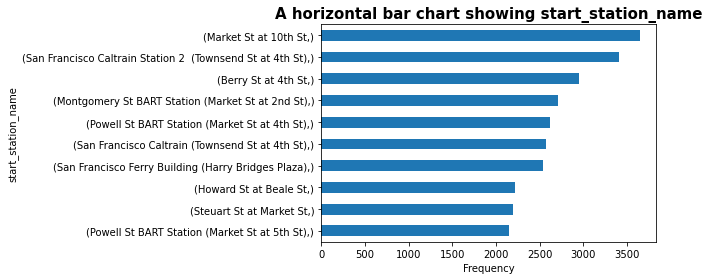

In [51]:
myTopTenPlots(dataframe = df_copy, xVar = 'start_station_name')

OBSERVATION: 'Market St at 10th Street' had the highest number of trips from start_station.

QUESTION 8: What start station had the lowest number of trips?

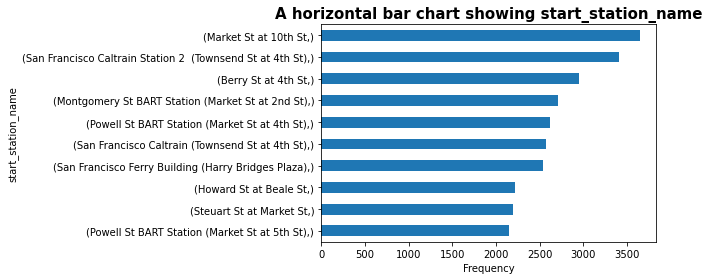

In [52]:
myLeastTenPlots(dataframe = df_copy, xVar = 'start_station_name')

OBSERVATION: '16th St Depot' had the lowest number of trips from start_station.

QUESTION 9: What end station had the highest number of trips?

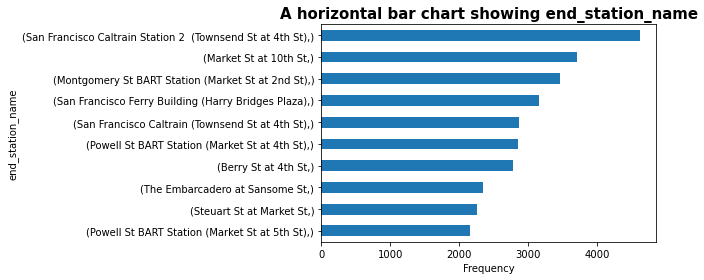

In [53]:
myTopTenPlots(dataframe = df_copy, xVar = 'end_station_name')

OBSERVATION: 'San Francisco Caltrain Station 2(Townsend St at 4th St)' had the highest number of trips to the end_station.

QUESTION 10: What end station had the lowest number of trips?

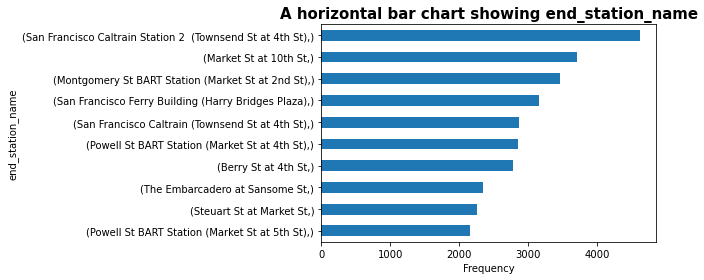

In [54]:
myLeastTenPlots(dataframe = df_copy, xVar = 'end_station_name')

OBSERVATION: 'Willow St at Vine St' had the lowest number of trips to the end_station.

QUESTION 11: What day of the week had the highest and lowest engagement of users?

In [55]:
# extract day of the week to 'day_of_week' column
df_copy['days']= pd.to_datetime(df_copy.start_time).dt.strftime('%A')
# check column
df_copy['days']

0         Thursday
2         Thursday
3         Thursday
4         Thursday
5         Thursday
            ...   
183407      Friday
183408      Friday
183409      Friday
183410      Friday
183411      Friday
Name: days, Length: 174952, dtype: object

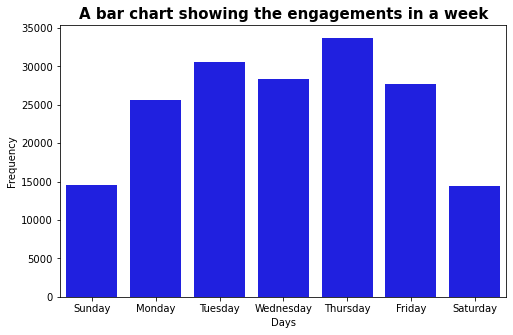

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
ax.set_xlim(left=0, right=100)
order= ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sns.countplot(data=df_copy, x='days', order=order, color='blue')
plt.title('A bar chart showing the engagements in a week', fontsize=15, fontweight='bold')
plt.xlabel('Days')
plt.ylabel('Frequency');

OBSERVATION: Thursday had the highest engagement and Saturday had the lowest engagement at the establishment.

QUESTION 12: What period of a day in a week had the highest engagement of users?

In [57]:
# extract am or pm and store in new column
df_copy['period_of_day']=pd.to_datetime(df_copy.start_time).dt.strftime('%p')
# check column
df_copy.period_of_day

0         PM
2         PM
3         PM
4         PM
5         PM
          ..
183407    AM
183408    AM
183409    AM
183410    AM
183411    AM
Name: period_of_day, Length: 174952, dtype: object

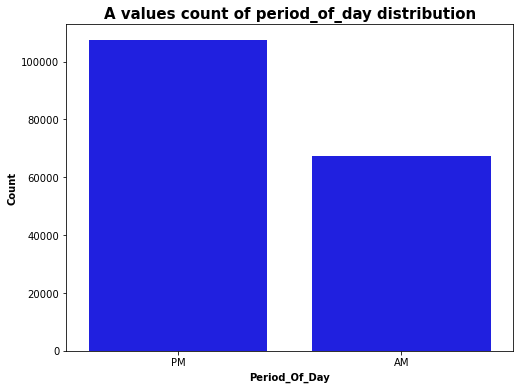

In [58]:
countPlot(dataframe = df_copy, xVar = 'period_of_day', color = 'blue')

OBSERVATION: There was more engagement of users at PM and lower engagement of users at AM.

# BIVARIATE VISUALIZATION

QUESTION 13: What age grade registered on this platform had the longest ride time?

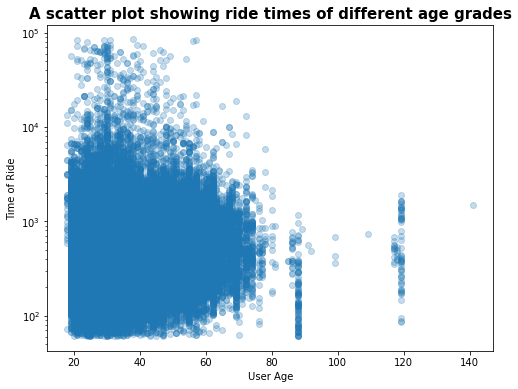

In [59]:
plt.figure(figsize=[8,6])
sns.regplot(data=df_copy,x='member_age', y='duration_sec', fit_reg= False, scatter_kws={'alpha':1/4});
plt.yscale('log')
plt.xlabel('User Age')
plt.ylabel('Time of Ride');
plt.title('A scatter plot showing ride times of different age grades', fontsize=15, fontweight='bold');

OBSERVATION: Ages 20 to about 70 had more ride time as compared to older users.

QUESTION 14: What is the gender distribution of the subscriber and customer?

In [60]:
#getting the value counts of each genders of the each user type
df_copy[['user_type', 'member_gender']].value_counts()

user_type   member_gender
Subscriber  Male             119007
            Female            36182
Customer    Male              11493
            Female             4623
Subscriber  Other              3197
Customer    Other               450
dtype: int64

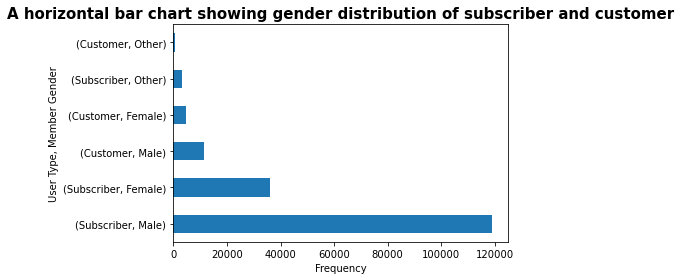

In [61]:
#horizontal bar plot to show the relationship between user type and member gender
df_copy[['user_type', 'member_gender']].value_counts().plot(kind='barh')
plt.title('A horizontal bar chart showing gender distribution of subscriber and customer', fontsize=15, fontweight='bold')
plt.xlabel('Frequency')
plt.ylabel('User Type, Member Gender')
plt.show();

In [62]:
#A function for my clustered bar plots in my visualization
def countPlot(dataframe, xVar, yVar):
    plt.figure(figsize = [8, 6])
    sns.countplot(data = dataframe, x = xVar, hue = yVar);
    plt.title(f'A values count of {xVar} distribution', fontsize = 15, fontweight = 'bold')
    plt.xlabel(xVar.title(), fontsize = 10, fontweight = 'bold')
    plt.ylabel('Count'.title(), fontsize = 10, fontweight = 'bold')
    plt.show();

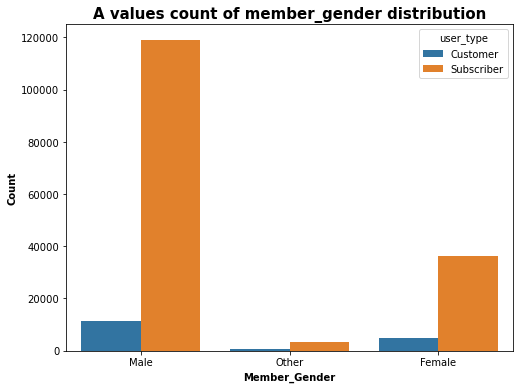

In [63]:
countPlot(dataframe = df_copy, xVar = 'member_gender', yVar = 'user_type')

OBSERVATION: For subscribers, there were 119007 males, 36182 females and 3197 others gender. while for customers, there were 11493 males, 4623 females and 450 others gender.

QUESTION 15: What is the age bracket of each of the user type?

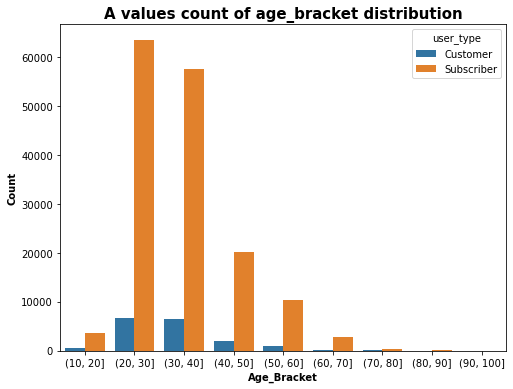

In [64]:
countPlot(dataframe = df_copy, xVar = 'age_bracket', yVar = 'user_type')

OBSERVATION: The age bracket of each user majorly falls between age 20 to 40.

QUESTION 16: What is the age distribution of each gender?

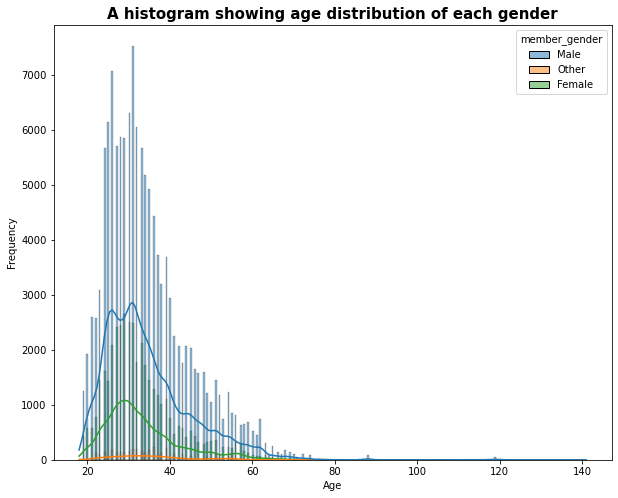

In [65]:
#A histogram showing the age distribution across all genders
plt.figure(figsize=[10,8])
sns.histplot(x='member_age', data=df_copy, hue='member_gender', kde=True)
plt.title('A histogram showing age distribution of each gender', fontsize=15, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Frequency');

OBSERVATION: It can be seen that for all member gender, majority fell within the ages of 20 - 40.

# MULTIVARIATE VISUALIZATION

QUESTION 17: What is the age distribution of each user type across each gender?
- Here i want to see the relationship between the member_gender, user_type, and member_age.

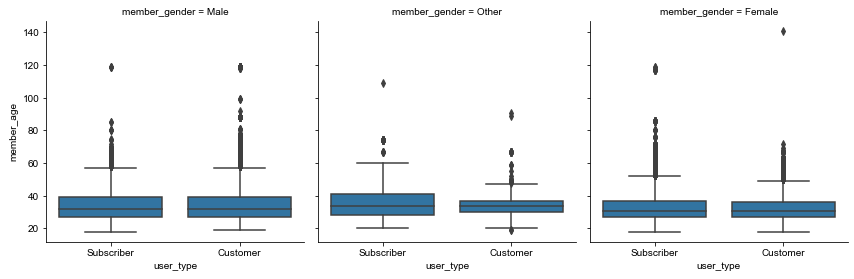

In [66]:
#A box plot showing the distribution of the user types of each members genders, across the members ages
g = sns.FacetGrid(data = df_copy, col = 'member_gender', height = 4)
g.map(sns.boxplot, 'user_type', 'member_age')
sns.set_style("whitegrid");

OBSERVATION:
- For each user type across each gender, subscribers and customers for the male gender have relatively the same distribution, with the male customers having more outliers as compared to subscribers.
- subscribers for the other gender have higher distribution compared to customer for the other gender, with customers having more outliers as compared to the subscribers.
- subscribers and customers for the female gender have relatively the same distribution, with subscriber having more outliers as compared to the customers.

QUESTION 18: What is the relationship between the user types, members ages and members genders?

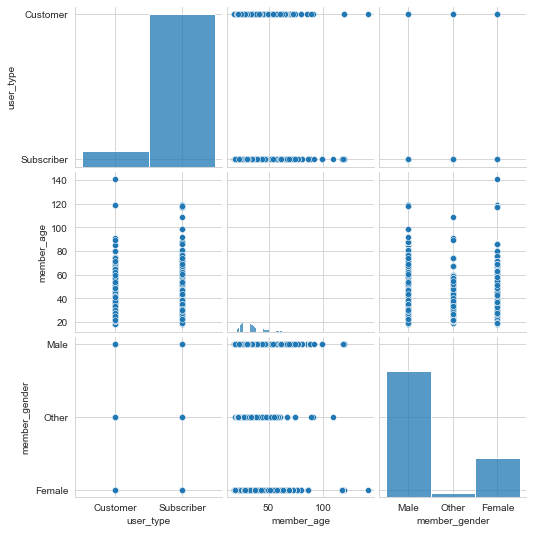

In [67]:
# A pair plot showing the relationship between the user type, members ages and the members genders
sns.pairplot(df_copy, vars = ["user_type", "member_age", "member_gender"])
plt.show();

OBSERVATION:
- Most of the subscribers fall between the ages of 20 to 100 years as compared to the customers that fall between the ages of 20 to 90.
- Most of the female gender fall between the ages of 20 to 80 as compared to the male gender that fall between the ages of 20 to 100 and other gender 20 to 60.

In [68]:
df_copy['user_type'].value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

QUESTION 19: What bracket was more open to bike sharing in all trips?

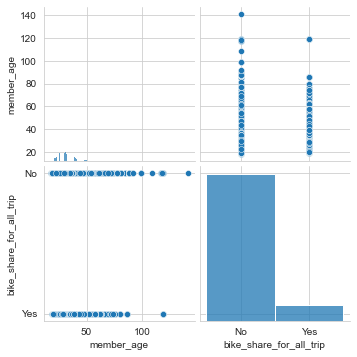

In [69]:
sns.pairplot(df_copy, vars = [ "member_age", "bike_share_for_all_trip"])
plt.show();

OBSERVATION:
- Users that opted for a bike share for all trips fall between the ages of 20 to 80, as compared to those that chose not to share ride whose ages fall between 20 - 100. It can be said that older people from the ages 80 to 100 and above were not comfortable sharing their bike rides.

### INSIGHTS: RELATIONSHIPS OBSERVED
- Majority of registered users fell under the ages of 20 to 50 years.
- Thursdays had the highest users activity and Saturday had the least.
- There were more users activity at PM and lesser users at AM.
- There were more registered male gender for all user types as compared to other genders.
- There were more older subscribers compared to customers.
- The male gender has older people as compared to the female and other gender.
- People from ages 80 to above 100 didn't like the idea of sharing a bike in all trips.

In [70]:
#Saving the new dataset to a csv file
df_copy.to_csv("clean-fordgobike-tripdata.csv", index=False)

In [71]:
#Check if it was properly saved
#data = pd.read_csv("clean-fordgobike-tripdata.csv")
#data